<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/ML2_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**



In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#**Loading The Data**

In [27]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "creditcard.csv"

C_card = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path)

<ipython-input-27-71c1936db49a>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  C_card = kagglehub.load_dataset(


In [28]:
C_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [29]:
C_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
C_card.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


#**Data preprocessing and feature engineering**

##preprocessing

In [31]:
C_card.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [32]:
C_card = C_card.drop(['Time'] , axis = 1)
#C_card = C_card.drop(['Amount'] , axis = 1)

In [33]:
x = C_card.drop(['Class'], axis=1)
y = C_card['Class']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[["Amount"]] = scaler.fit_transform(x[['Amount']])

##**Feature Creation**

In [35]:
x.corr().round(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
V1,1.00,0.00,-0.00,-0.0,0.00,-0.00,-0.0,-0.0,-0.00,0.0,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.0,0.00,0.00,-0.23
V2,0.00,1.00,0.00,-0.0,0.00,0.00,0.0,-0.0,0.00,-0.0,...,0.00,-0.00,0.00,0.00,0.00,-0.00,0.0,-0.00,-0.00,-0.53
V3,-0.00,0.00,1.00,0.0,-0.00,0.00,0.0,-0.0,0.00,0.0,...,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.0,0.00,0.00,-0.21
V4,-0.00,-0.00,0.00,1.0,-0.00,-0.00,-0.0,0.0,0.00,0.0,...,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.0,0.00,-0.00,0.10
V5,0.00,0.00,-0.00,-0.0,1.00,0.00,0.0,0.0,0.00,-0.0,...,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.0,0.00,-0.00,-0.39
V6,-0.00,0.00,0.00,-0.0,0.00,1.00,0.0,-0.0,0.00,0.0,...,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.0,-0.00,0.00,0.22
V7,-0.00,0.00,0.00,-0.0,0.00,0.00,1.0,0.0,0.00,-0.0,...,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.0,-0.00,-0.00,0.40
V8,-0.00,-0.00,-0.00,0.0,0.00,-0.00,0.0,1.0,0.00,-0.0,...,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.0,0.00,-0.00,-0.10
V9,-0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,1.00,-0.0,...,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.0,-0.00,0.00,-0.04
V10,0.00,-0.00,0.00,0.0,-0.00,0.00,-0.0,-0.0,-0.00,1.0,...,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.0,-0.00,0.00,-0.10


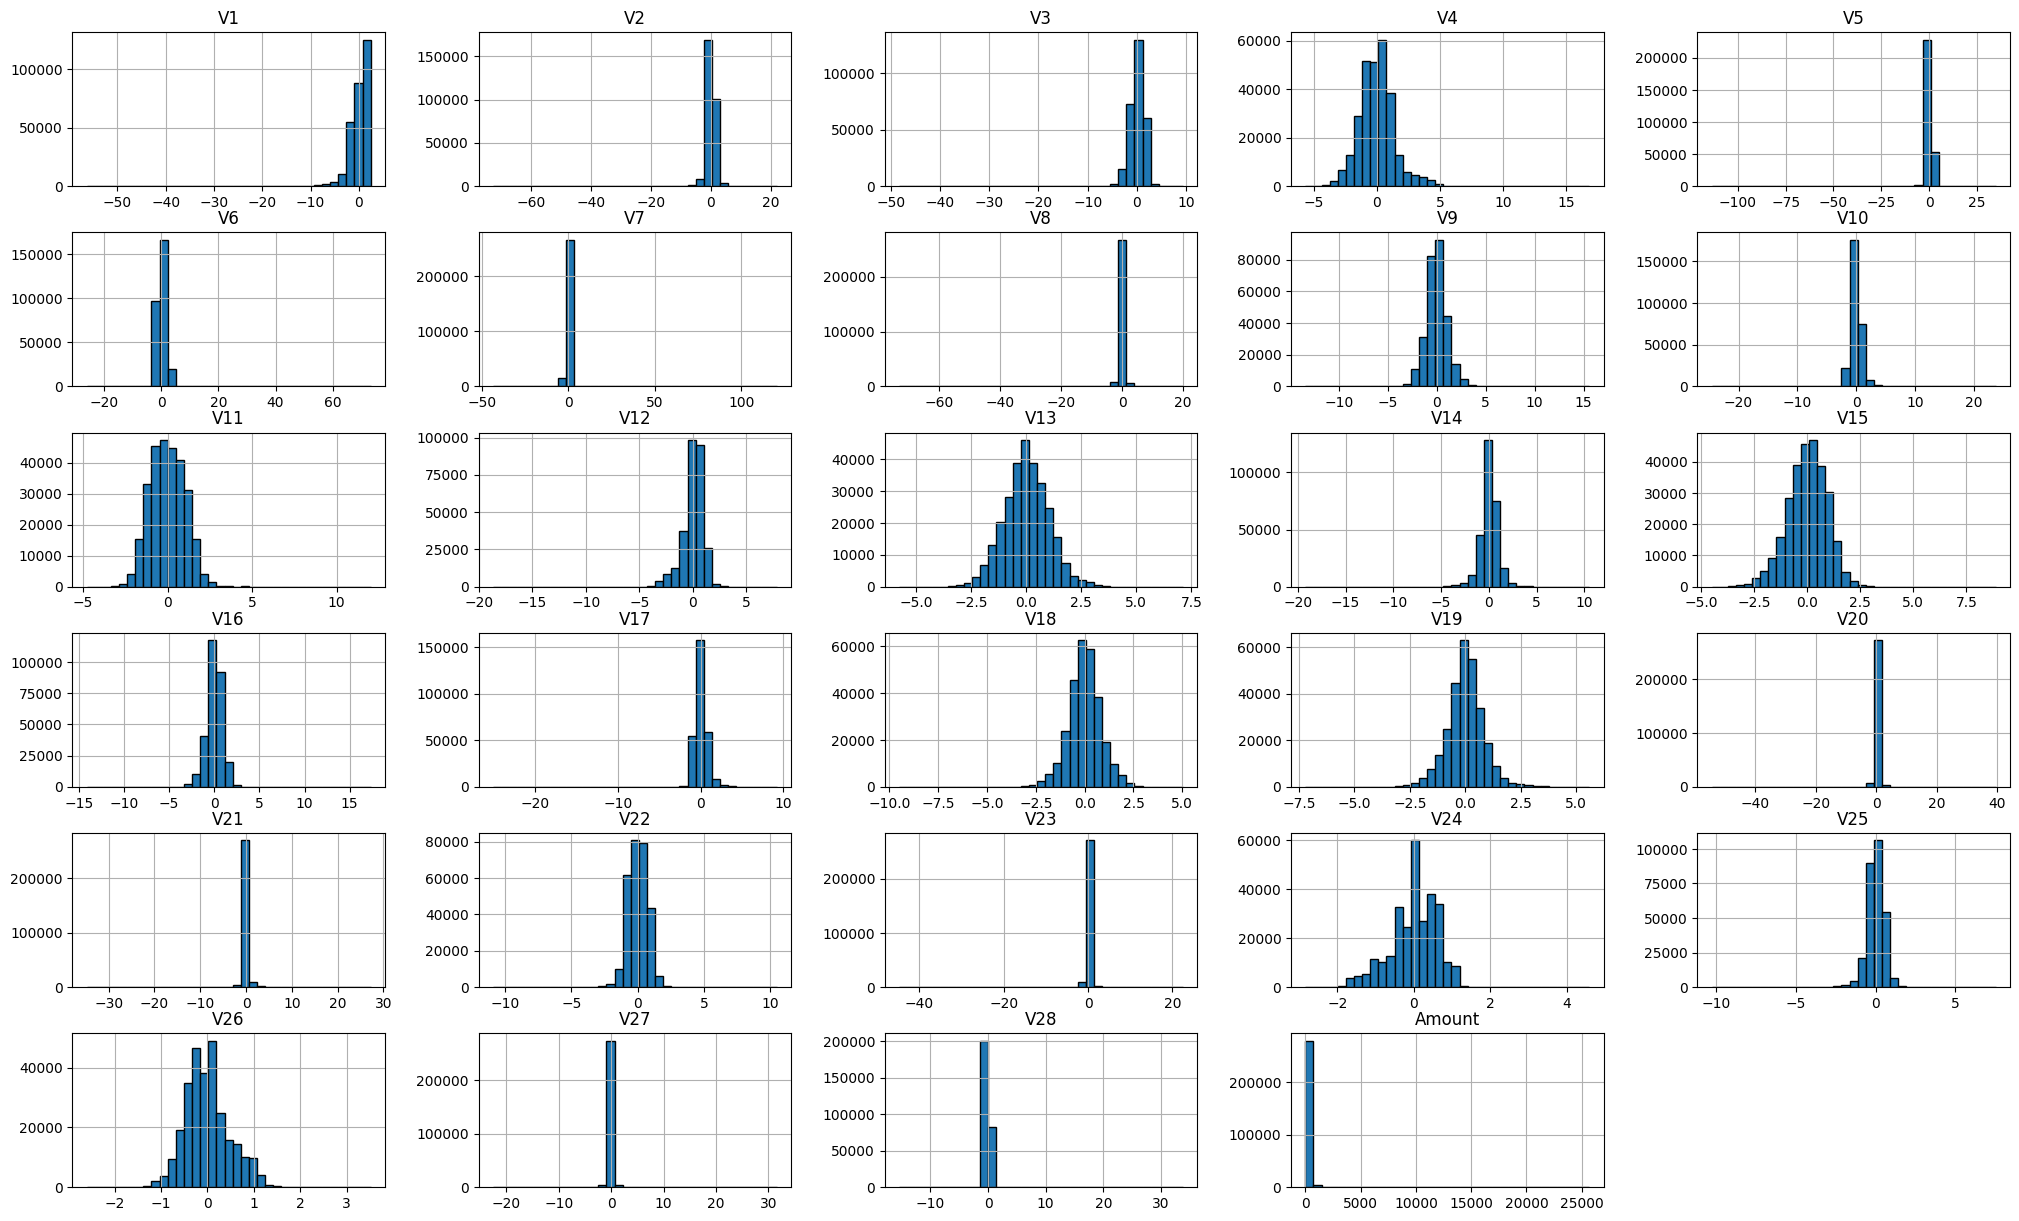

In [9]:
x.hist(figsize=(25, 15), bins=35, edgecolor='black')

plt.show()

In [10]:
#Left Skewed
x[["V1", "V2", "V6", "V7", "V11", "V15", "V16", "V17", "V21", "V22", "V23", "V24", "V26", "V27", "V28"]]=np.sqrt(x[["V1", "V2", "V6", "V7", "V11", "V15", "V16", "V17", "V21", "V22", "V23", "V24", "V26", "V27", "V28"]])
#Right Skewed
x[[ "V5", "V10", "V12", "V18", "V25","Amount"]]=np.sqrt(x[["V5", "V10", "V12", "V18", "V25","Amount"]])

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


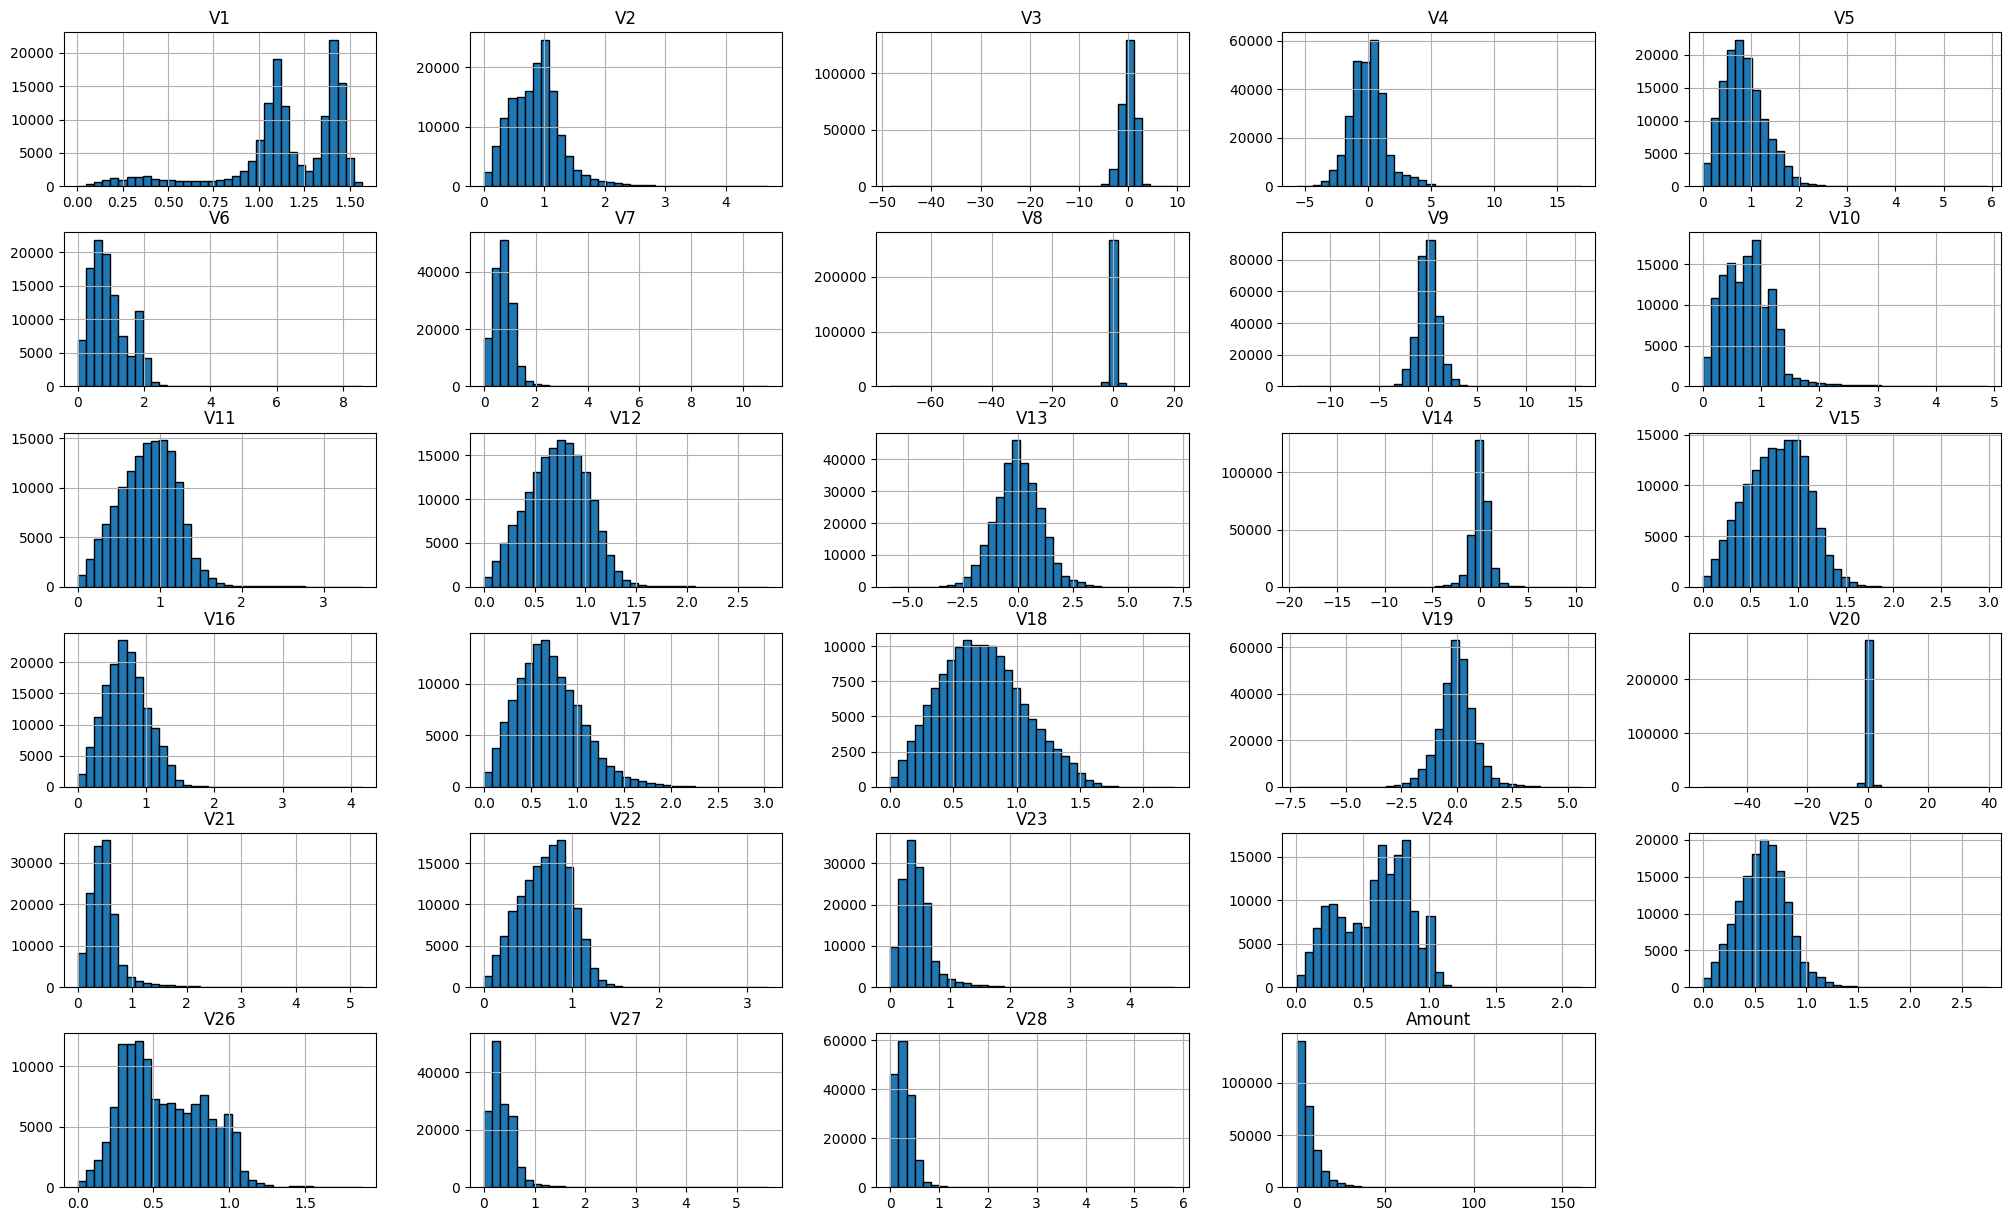

In [11]:
x.hist(figsize=(25, 15), bins=35, edgecolor='black')

plt.show()

##**Highly imbalanced**

Class
0    284315
1       492
Name: count, dtype: int64


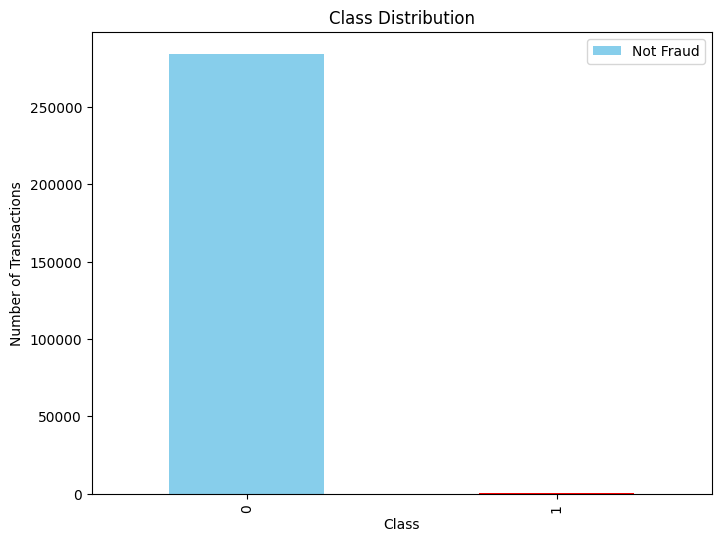

In [13]:
Label_counts = C_card['Class'].value_counts()

print(Label_counts)

plt.figure(figsize=(8, 6))
Label_counts.plot(kind='bar', color=['skyblue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.legend(['Not Fraud' , 'Fraud'])
plt.show()

In [14]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)
x_balanced = pd.DataFrame(x_resampled, columns=x.columns)
x_balanced['Class'] = y_resampled

Class
0    492
1    492
Name: count, dtype: int64


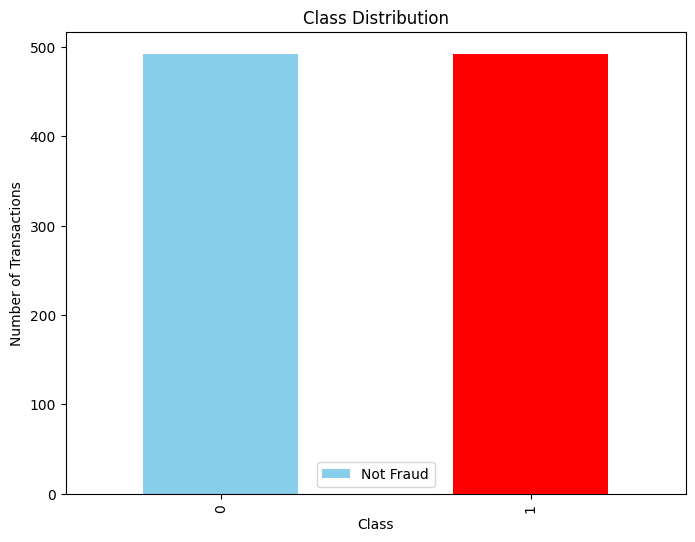

In [15]:
Balanced_Label_counts = x_balanced['Class'].value_counts()

print(Balanced_Label_counts)

plt.figure(figsize=(8, 6))
Balanced_Label_counts.plot(kind='bar', color=['skyblue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.legend(['Not Fraud' , 'Fraud'])
plt.show()

In [16]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [17]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_resampled)

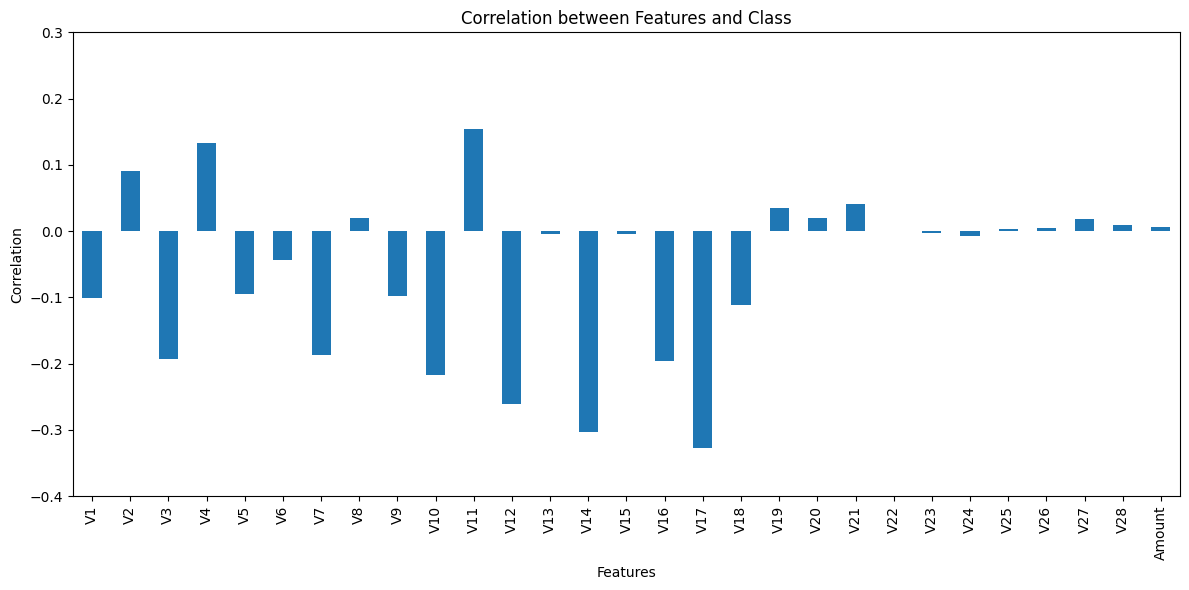

In [18]:
correlation_matrix = C_card.corrwith(C_card['Class']).drop('Class')
plt.figure(figsize=(12, 6))
correlation_matrix.plot(kind='bar')
plt.title('Correlation between Features and Class')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylim(-0.4, 0.3)
plt.tight_layout()
plt.show()

#Dimensionality reduction (PCA, t-SNE)

In [19]:
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca_reduced.fit_transform(x_scaled)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(x_resampled)
# cv = cumulative_variance
cv = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(cv, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_resampled)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Credit Card Fraud')
plt.colorbar(label='Class')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_pca_reduced)
cluster_labels = kmeans.labels_
#t-SNE before clustering
tsne = TSNE(n_components=2, random_state=42)
x_tsne_before = tsne.fit_transform(x_scaled)

#t-SNE after clustering
x_tsne_after = tsne.fit_transform(x_pca_reduced)

In [ ]:
#t-SNE before clustering
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne_before[:, 0], x_tsne_before[:, 1], c=y_resampled)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE before Clustering')
plt.colorbar(label='Class')
plt.show()

In [ ]:
#t-SNE after clustering
plt.figure(figsize=(8, 6))
plt.scatter(x_tsne_after[:, 0], x_tsne_after[:, 1], c=cluster_labels)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE after Clustering')
plt.colorbar(label='Class')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
inertia = []
sil_avg = []
k_range = range (2,11)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(x_pca_reduced)
  inertia.append(kmeans.inertia_)
  sil_avg.append(silhouette_score(x_pca_reduced, labels))

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_range, sil_avg, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.grid()
plt.show()

In [ ]:
import matplotlib.cm as cm
for n_clusters in [2, 3, 4]:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # lie within [-0.1, 1] because of the standard scaler
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    ax1.set_ylim([0, len(x_pca_reduced) + (n_clusters + 1) * 10])

    cluster = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = cluster.fit_predict(x_pca_reduced)
    sil_avg = silhouette_score(x_pca_reduced , cluster_labels)
    sample_sil_values = silhouette_samples(x_pca_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_sil_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower , y_upper) , 0 , ith_cluster_silhouette_values , facecolor=color , edgecolor = color , alpha = 0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=sil_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"% n_clusters,fontsize=14,fontweight="bold",)

    plt.show()
